 TASK 1
1. Use SGD regressor on datasets. Use food.csv data set and implement SGD regressor, print the learning graph and accuracy of the model. 

Mean Squared Error: 56517.4880073163
R-squared Score: 0.33137559527091787


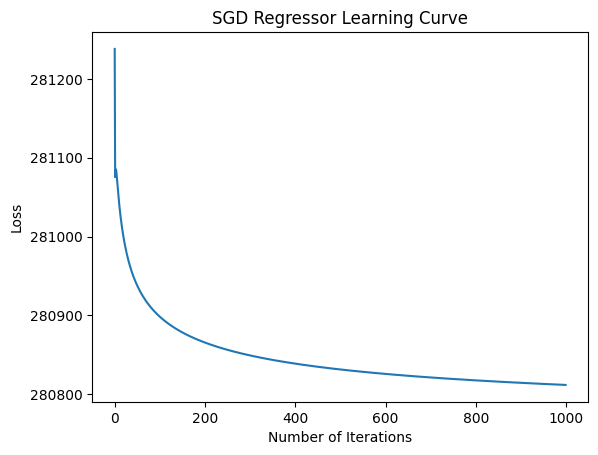

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Load the dataset (assuming it's in the same directory as the script)
data = pd.read_csv("food.csv")

# Assume that 'target_column' is the column you want to predict
target_column = "score"
X = data.drop(target_column, axis=1)
y = data[target_column]

# Label encode 'title' and 'id' columns
le = LabelEncoder()
X['title'] = le.fit_transform(X['title'])
X['id'] = le.fit_transform(X['id'])
X['url'] = le.fit_transform(X['url'])
X['body'] = le.fit_transform(X['body'])
X['timestamp'] = le.fit_transform(X['timestamp'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SGD)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SGDRegressor instance
regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Manually capture the loss values during training
loss_values = []
for epoch in range(1000):  # Adjust the number of epochs as needed
    regressor.partial_fit(X_train_scaled, y_train)
    y_pred = regressor.predict(X_train_scaled)
    mse = mean_squared_error(y_train, y_pred)
    loss_values.append(mse)

# Predict on the test set
y_pred = regressor.predict(X_test_scaled)

# Calculate and print the Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
score = r2_score(y_test, y_pred)
print("R-squared Score:", score)

# Plot the learning graph
plt.plot(loss_values)
plt.title("SGD Regressor Learning Curve")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()


 TASK 2 To learn how to handle descriptive categorical variable in Linear Regression, develop the model as described below, (a) Load flight.csv data set. (b) Apply pre-processing on data set. (c) Encode categorical features into numerical values. (d) Apply linear regression model from sklearn library. (e) Predict the delay of flight departure. 


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# (a) Load flight.csv data set
df = pd.read_csv("flight.csv")
df.head()

,UniqueCarrier,Origin,Distance,CRSDepTime,DepDelay
0,AA,JFK,2353,1003,-2
1,DL,JFK,4567,356,45
2,WN,JFK,344,383,-3
3,DL,DFW,317,2298,-5
4,B6,ATL,1905,1839,45


In [3]:
# (b) Apply pre-processing on data set
null_values = df.isnull().sum()
print(null_values)


UniqueCarrier    0
Origin           0
Distance         0
CRSDepTime       0
DepDelay         0
dtype: int64


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# (a) Load flight.csv data set
data = pd.read_csv("flight.csv")

# (b) Apply pre-processing on the data set
# Assuming 'DepDelay' is the target column to predict
target_column = "DepDelay"
X = data.drop(target_column, axis=1)
y = data[target_column]

# Assume 'UniqueCarrier' and 'Origin' are categorical features
categorical_features = ['UniqueCarrier', 'Origin']
X_categorical = X[categorical_features]
X_numerical = X.drop(categorical_features, axis=1)

# (c) Encode categorical features into numerical values
# Use OneHotEncoder for encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# (d) Apply linear regression model from sklearn library
# Create a pipeline with preprocessing and linear regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# (e) Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the delay of flight departure on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 653.07859743293


In [5]:
# (b) Apply pre-processing on data set
null_values = df.isnull().sum()
print(null_values)



UniqueCarrier    0
Origin           0
Distance         0
CRSDepTime       0
DepDelay         0
dtype: int64


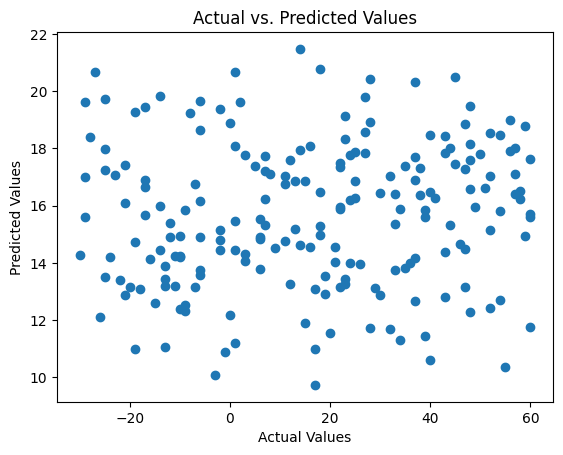

In [6]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

TASK
3. To learn how to handle continues target variable in Linear Regression Model, Read the following example and develop the proper model. The ALCustomers.csv data contains data of airline customer. The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values. Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers. (a) Develop a prediction model that predict that either customer would be satisfy with the current services or not. (b) Predict the factors (e.g. descriptive variables) that need improvements to increase customer satisfaction rate. 


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("Alcustomer.csv")

# Assume 'satisfaction' is the target variable
target_column = "satisfaction"
X = data.drop(target_column, axis=1)
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Create a Logistic Regression model pipeline with imputation
model = Pipeline([
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),  # Choose imputation strategy
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
# Get feature names after one-hot encoding (if applicable)
feature_names = X.columns.tolist()


Accuracy: 0.8787835041624561

Confusion Matrix:
[[10626  1087]
 [ 1432  7636]]

Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.91      0.89     11713
              satisfied       0.88      0.84      0.86      9068

               accuracy                           0.88     20781
              macro avg       0.88      0.87      0.88     20781
           weighted avg       0.88      0.88      0.88     20781



In [15]:
# Get coefficients and their corresponding features
coefficients = model.named_steps['classifier'].coef_[0]

# Combine feature names and coefficients
feature_coefficients = list(zip(feature_names, coefficients))

# Sort features by their coefficients
feature_coefficients.sort(key=lambda x: abs(x[1]), reverse=True)

# Display feature coefficients
print("Feature Coefficients are:")
for feature, coef in feature_coefficients:
    print(f"{feature}: {coef}")


Feature Coefficients are:
Arrival Delay in Minutes: -1.0004768976281235
Departure Delay in Minutes: 0.9959136439275648
Departure/Arrival time convenient: 0.838390860400836
Age: 0.5106502210803967
Inflight entertainment: 0.4133585750484487
Food and drink: 0.3992164279258385
Checkin service: -0.3919740379466015
Online boarding: 0.33633740475028717
Leg room service: 0.29337922639568154
Class: -0.20239096805719684
Baggage handling: 0.1990962498487794
Type of Travel: -0.1834439934274642
id: -0.17206442719037915
Seat comfort: 0.16586650286163512
On-board service: 0.1520022783910496
Gender: -0.12299526063452654
Ease of Online booking: 0.1006570848181955
Gate location: 0.047369835402040164
Flight Distance: 0.03585867954137017
Inflight service: -0.02815652584463328
Inflight wifi service: -0.024982707555498543
Cleanliness: 0.023593272144182557
Unnamed: 0: -0.021120894227059744
Customer Type: -0.0069544649467294115
